In [272]:
import tensorflow as tf
import random
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import yfinance as  yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [273]:
datasets = ['TSLA']

for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start='2024-01-01', end='2024-02-29')
    filename = f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as {filename}")


Download data for TSLA and saved as TSLA_data.csv


In [274]:
Ticker = 'TSLA'
start_date = '2024-01-01'
end='2024-02-29'
data = yf.download(Ticker, start_date, end)

[*********************100%%**********************]  1 of 1 completed


In [275]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600
2024-01-09,238.110001,238.960007,232.039993,234.960007,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,227.220001,105873600
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000


In [276]:
df = data['Close']

In [277]:
raw = pd.DataFrame(df.loc[:])

In [278]:
[symbol] = raw.columns

In [279]:
raw

,Close
Date,
2024-01-02,248.419998
2024-01-03,238.449997
2024-01-04,237.929993
2024-01-05,237.490005
2024-01-08,240.449997
2024-01-09,234.960007
2024-01-10,233.940002
2024-01-11,227.220001
2024-01-12,218.889999


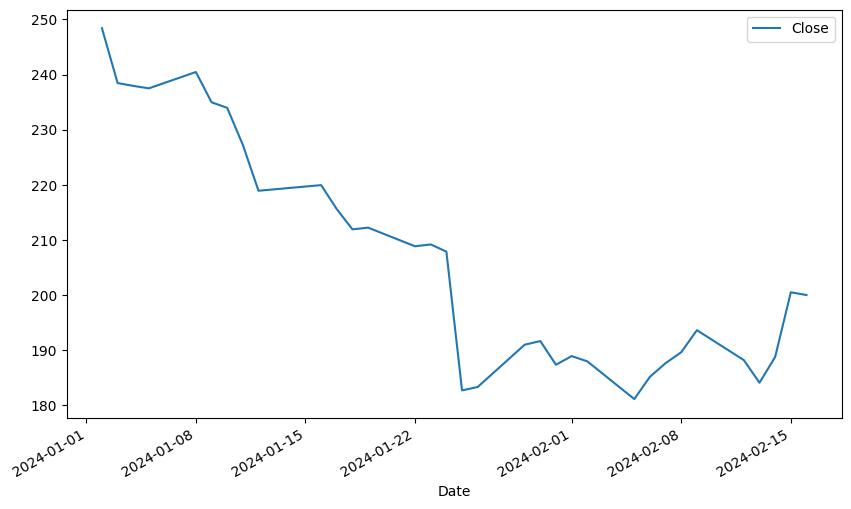

In [280]:
raw.plot(figsize=(10, 6));

In [281]:
lags = 5

In [282]:
def add_lags(raw, symbol, lags, window=20):
    cols = []
    dt = raw.copy()
    raw.dropna(inplace=True)
    dt['r'] = np.log(dt/ dt.shift())
    dt['sma'] = dt[symbol].rolling(window).mean()
    dt['min'] = dt[symbol].rolling(window).min()
    dt['max'] = dt[symbol].rolling(window).max()
    dt['mom'] = dt['r'].rolling(window).mean()
    dt['vol'] = dt['r'].rolling(window).std()
    dt.dropna(inplace=True)
    dt['d'] = np.where(dt['r'] > 0, 1, 0)
    features = [symbol, 'r', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            dt[col] = dt[f].shift(lag)
            cols.append(col)
    dt.dropna(inplace=True)
    return dt, cols




In [283]:
raw, cols = add_lags(raw, symbol, lags)

In [284]:
len(raw)

8

In [285]:
c= raw['d'].value_counts()

In [286]:
c

1    5
0    3
Name: d, dtype: int64

In [287]:
def cw(dt):
    c0, c1 = np.bincount(dt['d'])
    w0 = (1/c0) * (len(dt)) / 2
    w1 = (1/c1) * (len(dt)) / 2
    return {0: w0, 1: w1}

In [288]:
class_weight = cw(raw)

In [289]:
class_weight

{0: 1.3333333333333333, 1: 0.8}

In [290]:
class_weight[0]  * c[0]


4.0

In [291]:
class_weight[1] * c[1]

4.0

In [292]:
def set_seeds(seed=1000):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [293]:
optimizer = Adam(lr=0.001)

In [294]:
def create_model(hl=1, hu=128, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=len(cols),
                    activation='relu'))
    for _ in range(hl):
        model.add(Dense(1, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


In [295]:
set_seeds()
model = create_model(hl=1, hu=128)

In [296]:
%%time
model.fit(raw[cols], raw['d'], epochs=50,
          verbose=False, class_weight=cw(raw))

CPU times: user 1.13 s, sys: 12.5 ms, total: 1.14 s
Wall time: 1.1 s


In [297]:
model.evaluate(raw[cols], raw['d'])

1/1 [==============================] - 0s 134ms/step - loss: 0.6949 - accuracy: 0.3750


[0.6948691606521606, 0.375]

In [298]:
raw ['p'] = np.where(model.predict(raw[cols]) > 0.5, 1, 0)

1/1 [==============================] - 0s 57ms/step


In [299]:
raw['p'].value_counts()

0    8
Name: p, dtype: int64

In [300]:
split = int(len(raw) * 0.8)


In [301]:
train = raw.iloc[:split].copy()


In [302]:
test = raw.iloc[split:].copy()


In [303]:
set_seeds()
model = create_model(hl=1, hu=128)

In [304]:
split = int(len(raw) * 0.8)

In [305]:
train = raw.iloc[:split].copy()

In [306]:
train

,Close,r,sma,min,max,mom,vol,d,Close_lag_1,Close_lag_2,...,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,p
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-07,187.580002,0.013309,201.577501,181.059998,233.940002,-0.011260,0.033887,1,185.100006,181.059998,...,-0.013565,-0.011801,-0.011658,-0.014123,0.033473,0.033005,0.032620,0.032657,0.032927,0
2024-02-08,189.559998,0.010500,199.358501,181.059998,227.220001,-0.010518,0.034208,1,187.580002,185.100006,...,-0.013081,-0.013565,-0.011801,-0.011658,0.033887,0.033473,0.033005,0.032620,0.032657,0
2024-02-09,193.570007,0.020934,197.676001,181.059998,219.910004,-0.008014,0.034603,1,189.559998,187.580002,...,-0.011260,-0.013081,-0.013565,-0.011801,0.034208,0.033887,0.033473,0.033005,0.032620,0
2024-02-12,188.130005,-0.028506,196.138001,181.059998,219.910004,-0.007572,0.034263,0,193.570007,189.559998,...,-0.010518,-0.011260,-0.013081,-0.013565,0.034603,0.034208,0.033887,0.033473,0.033005,0
2024-02-13,184.020004,-0.022089,194.343501,181.059998,215.550003,-0.008909,0.034283,0,188.130005,193.570007,...,-0.008014,-0.010518,-0.011260,-0.013081,0.034263,0.034603,0.034208,0.033887,0.033473,0
2024-02-14,188.710007,0.025167,193.001501,181.059998,212.190002,-0.006649,0.034994,1,184.020004,188.130005,...,-0.007572,-0.008014,-0.010518,-0.011260,0.034283,0.034263,0.034603,0.034208,0.033887,0


In [308]:
test = raw.iloc[split:].copy()

In [309]:
test

,Close,r,sma,min,max,mom,vol,d,Close_lag_1,Close_lag_2,...,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5,p
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,200.449997,0.060353,192.430001,181.059998,212.190002,-0.002773,0.037937,1,188.710007,184.020004,...,-0.008909,-0.007572,-0.008014,-0.010518,0.034994,0.034283,0.034263,0.034603,0.034208,0
2024-02-16,199.949997,-0.002498,191.818001,181.059998,209.139999,-0.002971,0.037924,0,200.449997,188.710007,...,-0.006649,-0.008909,-0.007572,-0.008014,0.037937,0.034994,0.034283,0.034263,0.034603,0


In [310]:
set_seeds()



In [311]:
model = create_model(hl=1, hu=128)

In [312]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [313]:
%%time
model.fit(train[cols], train['d'],
                    epochs=50, verbose=True,
                    validation_split=0.2, shuffle=True,
                    class_weight=cw(train))

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 8.9557 - accuracy: 0.7500

1/1 [==============================] - 1s 1s/step - loss: 8.9557 - accuracy: 0.7500 - val_loss: 9.4786 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 7.0909 - accuracy: 0.7500 - val_loss: 7.1026 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 56ms/step - loss: 5.3009 - accuracy: 0.7500 - val_loss: 4.8042 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 3.5867 - accuracy: 0.7500 - val_loss: 2.5929 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 45ms/step - loss: 1.9141 - accuracy: 0.7500 - val_loss: 0.7537 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 0.5840 - accuracy: 0.7500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6504 - accuracy: 0.2500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
1/1 [========================

In [314]:
model.evaluate(train[cols], train['d'])

1/1 [==============================] - 0s 27ms/step - loss: 0.6921 - accuracy: 0.6667


[0.6920523047447205, 0.6666666865348816]

In [315]:
model.evaluate(test[cols], test['d'])

1/1 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693152666091919, 0.5]

In [316]:
test['p'] = np.where(model.predict(test[cols]) > 0.5, 1, 0)

1/1 [==============================] - 0s 63ms/step


In [317]:
test['p'].value_counts()

1    2
Name: p, dtype: int64